# <h1 align="center"><font color="red">Exploratory Data Analysis (EDA) for Time Series: Electricity Consumption</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

![](https://storage.googleapis.com/kaggle-datasets-images/3021996/5196931/365ecab72e48aef3392086038412df87/dataset-cover.jpg?t=2023-03-19-23-43-44)

Link do dataset:

* [Hourly Electricity Consumption and Production](https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production)


Ver também:

* [⚡Forecasting Electricity by Hour:RNN vs LSTM🔌💡](https://www.kaggle.com/code/marianadeem755/forecasting-electricity-by-hour-rnn-vs-lstm)

`Sobre o conjunto de dados`


Séries temporais horárias de consumo e produção de eletricidade (com tipo de produção) na `Romênia`.

Atualizado em `02` de abril de `2024`.

Inclui o consumo e a produção por hora, e a produção é dividida em uma das categorias: Nuclear, Eólica, Hidrelétrica, Petróleo e Gás, Carvão, Solar, Biomassa.

Acho que esse é um bom conjunto de dados, pois a Romênia inclui um amplo espectro de produções de eletricidade, incluindo bastante energia solar e eólica, mas também nuclear!

É um conjunto de dados bem grande, de mais de 5 anos!

Quando a produção é maior que o consumo significa que estamos exportando eletricidade, quando o valor é menor significa que estamos importando eletricidade.

Todos os valores estão em `MWs`.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Electricity.csv")
df.head().style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [3]:
df.shape

(46011, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [6]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46011 non-null  datetime64[ns]
 1   Consumption    46011 non-null  int64         
 2   Production     46011 non-null  int64         
 3   Nuclear        46011 non-null  int64         
 4   Wind           46011 non-null  int64         
 5   Hydroelectric  46011 non-null  int64         
 6   Oil and Gas    46011 non-null  int64         
 7   Coal           46011 non-null  int64         
 8   Solar          46011 non-null  int64         
 9   Biomass        46011 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.5 MB


In [8]:
df.describe().style.background_gradient()


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,2021-08-16 11:19:47.715981056,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
min,2019-01-01 00:00:00,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,2020-04-24 06:30:00,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,2021-08-16 12:00:00,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,2022-12-08 15:30:00,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,2024-03-31 23:00:00,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000
std,nan,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554


In [9]:
print("Starting Date: ", df['DateTime'].min())
print("End Date     : ", df['DateTime'].max())

Starting Date:  2019-01-01 00:00:00
End Date     :  2024-03-31 23:00:00


A seguir vamos plotar um mix energético de consumo da Romênia, padrões temporais de cada fonte de energia, complementariedade entre diferentes fontes de energia, variabilidade das fontes renováveis vs convencionais, sazonalidade, e outras análises.

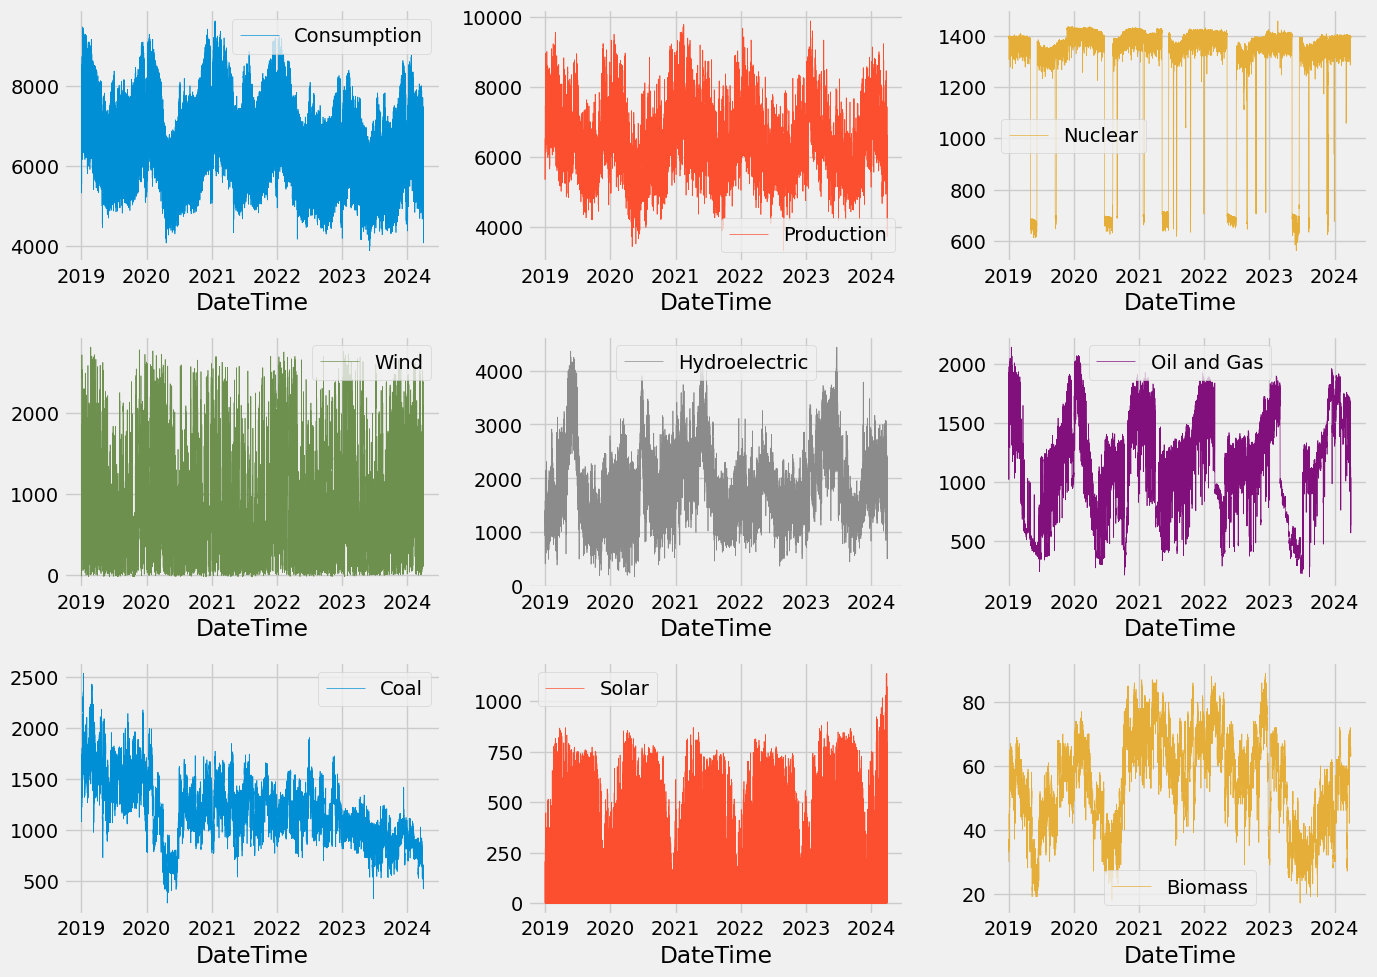

In [10]:
plt.style.use('fivethirtyeight')

df2 = df.copy('Deep') # Deep copy - modificações não afetam o original
df2 = df2.set_index('DateTime')

# Facet plots:
df2.plot(subplots=True,
        linewidth=0.5,
        layout=(3, 3),
        figsize=(14, 10),
        sharex=False,
        sharey=False)
plt.tight_layout()
plt.show()


In [ ]:
# Create the first subplot with red color
ax1 = sns.displot(data=df, x="Consumption", kde=True, bins=100, color="red", 
            facecolor="#FF0000", height=5, aspect=3.5)

# Create the second subplot on the same figure with blue color
ax2 = sns.displot(data=df, x="Production", kde=True, bins=100, color="blue", 
            facecolor="#0000FF", height=5, aspect=3.5)

In [ ]:
df_consumption = df[['DateTime','Consumption']]
df_consumption.head()

In [ ]:
df5 = df_consumption.copy('Deep')
df5 = df5.set_index('DateTime')
df5['Consumption'].plot(figsize=(20,5))
plt.show()

In [ ]:
## xlimit and y limit
df5['Consumption'].plot(xlim=['2024-01-01','2024-03-31'],figsize=(20,5))
plt.show()

In [ ]:
## xlimit and y limit
df5['Consumption'].plot(xlim=['2024-01-01','2024-03-31'],figsize=(20,5),ylim=[3000,10000],ls='--',c='Red')
plt.show()

In [ ]:
index=df5.loc['2023-01-01':'2023-09-01'].index
Consumption=df5.loc['2023-01-01':'2023-09-01']['Consumption']
Consumption

In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use('fivethirtyeight')
df5 = df_consumption.copy('Deep')
df5 = df5.set_index('DateTime')
df5['Consumption'].plot(figsize=(20,5))
plt.show()

In [ ]:
ax = df5['Consumption'].plot(xlim=['2020-01-01','2023-12-31'], ylim=[3000,10000] ,color ="Red", figsize=(20,7))
ax.set_xlabel('Date', color = "Red" ,fontsize= 20)
ax.set_ylabel('Electricity Consumption', color = "Red", fontsize=20)
ax.set_title('Electricity Consumption from 2020-01-01 to 2023-12-31 ', color = "Blue",  fontsize=24 ,pad=20)
plt.show()

In [ ]:
# adding markers
ax = df5['Consumption'].plot(xlim=['2020-01-01','2023-12-31'], ylim=[3000,10000] ,color ="Red", figsize=(20,7))
ax.set_xlabel('Date', color = "Red" ,fontsize= 20)
ax.set_ylabel('Electricity Consumption', color = "Red", fontsize=20)
ax.set_title('Electricity Consumption from 2020-01-01 to 2023-12-31 ', color = "Blue",  fontsize=24 ,pad=20)

ax.axvline('2021-01-01', color='Blue', linestyle='--', lw = 5)
ax.axvline('2021-12-31', color='Blue', linestyle='--', lw = 5)
ax.axhline(7000, color='green', linestyle='--', lw = 5)
plt.show()

In [ ]:
# Highlighting regions of interest
ax = df5['Consumption'].plot(xlim=['2020-01-01','2023-12-31'], ylim=[3000,10000] ,color ="Blue", figsize=(20,12))
ax.set_xlabel('Date', color = "Red" ,fontsize= 20)
ax.set_ylabel('Electricity Consumption', color = "Red", fontsize=20)
ax.set_title('Electricity Consumption from 2020-01-01 to 2023-12-31 ', color = "Blue",  fontsize=24 ,pad=20)

ax.axvspan('2021-01-01', '2021-12-31', color='Red', alpha=0.3)
ax.axhspan(8000, 6000, color='green', alpha=0.3)
plt.show()

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,Consumption);

In [ ]:
##year end frequency
df5.resample(rule='A').max()['Consumption'].plot(figsize=(20,5));

In [ ]:
df5.resample(rule='QS').max()['Consumption'].plot(figsize=(20,5));

In [ ]:
##plotting
df5['Consumption'].resample(rule='A').mean().plot(kind='bar',figsize=(20,5));

In [ ]:
df5['Consumption'].resample(rule='M').max().plot(kind='bar',figsize=(20,5));

In [ ]:
df5['Consumption'].rolling(5).max().head(8)

In [ ]:
count_date = df5.groupby(df5.index.date)['Consumption'].sum()

pw_clean = pd.DataFrame(count_date)
pw_clean['DateTime'] = pd.to_datetime(pw_clean.index) 
pw_clean = pw_clean.set_index('DateTime')
pw_clean.head()

In [ ]:
pw_clean['Consumption:30 days rolling']=pw_clean['Consumption'].rolling(30).mean()
pw_clean.head(3)

In [ ]:
pw_clean[['Consumption','Consumption:30 days rolling']].plot(figsize=(20,5));

In [ ]:
import matplotlib.cm as cm  # Import colormap library

df1 = df[['DateTime','Consumption']].copy('Deep')
df1 = df1.set_index('DateTime')
 
years = [2019, 2020, 2021, 2022, 2023, 2024]

cmap = cm.get_cmap('tab20')  # Choose a colormap with bright colors

fig, axs = plt.subplots(len(years), 1, figsize=(20, 15))  # Adjust figsize for layout
for i, year in enumerate(years):
    df_year = df1[(df1.index >= f"{year}-01-01") & (df1.index < f"{year+1}-01-01")]
    color = cmap(i / (len(years) - 1))  # Get color from colormap based on index
    axs[i].plot(df_year, lw=3, color=color, label=f"{year}")  # Include year as label

# Set common labels and title
axs[0].set_xlabel('Time', fontsize=14)  # Set on first subplot for all
axs[-1].set_ylabel('Energy Consumption]', fontsize=14)  # Set on last subplot for all
plt.suptitle('Energy consumption \n', weight='bold', fontsize=20, color='#DE3163')

# Add legend
handles, labels = axs[-1].get_legend_handles_labels()  # Get labels from last subplot
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1.15), fontsize=12)  # Add legend outside plot

plt.tight_layout()
plt.show()

In [ ]:
df.head(2)

In [ ]:
df2 = df.copy('Deep')
df2 = df2.set_index('DateTime')

dfSummer = df2[["Consumption", "Production"]]["2024-03-01 00:00:00" : "2024-04-01 23:59:59"]
dfSummer.plot(style="-", figsize=(20, 6), title=f"Consumption Production, in MW")
plt.ylabel('MW')
plt.show()

In [ ]:
data1 = df[(df['DateTime'] >= '2024-01-01') & (df['DateTime'] < '2024-04-01')]

plt.figure(figsize=(20,6))
plt.plot(data1['DateTime'], data1['Consumption'], color='Gold')
plt.ylabel('Consumption', fontsize=12)
plt.xlabel('DateTime', fontsize=12)
plt.title('Electricity Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

In [ ]:
df1 = df.copy('Deep')
df1= df1.set_index('DateTime')

fig, ax = plt.subplots(figsize=(20,4)) # Create the figure and axes object

fig.suptitle('Production Vs Consumption', fontsize=16)
# Plot the first x and y axes:
df1.resample('M').mean().plot.area(use_index=True, y = 'Consumption', ax = ax,color='Blue') 
df1.resample('M').mean().plot.area(use_index=True, y = 'Production', ax = ax, secondary_y = False,color='Red') ;

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df1['Consumption'], model='additive', period=1)
decomp.plot()
plt.show()

In [ ]:
df_con = df.copy('deep')
df_con["DATE"] = pd.to_datetime(df_con["DateTime"]).dt.date
df_con["TIME"] = pd.to_datetime(df_con["DateTime"]).dt.time
df_con = df_con.set_index('DateTime')
df_con = df_con[["Consumption", "Production", "Solar","DATE" , "TIME"]]["2024-03-01 00:00:00" : "2024-03-30 23:59:59"]
df_con.head()

In [ ]:
# Calculate daily consumption and production sums
daily_consumption = df_con.groupby('DATE')['Consumption'].agg('sum')
daily_production = df_con.groupby('DATE')['Production'].agg('sum')

# Create the combined plot
fig, ax = plt.subplots(figsize=(20, 5))  # Create figure and axis

# Plot consumption (red) and production (blue) on the same axis
ax.bar(daily_consumption.index, daily_consumption, color='red', label='Consumption')
ax.bar(daily_production.index, daily_production, color='blue', label='Production', bottom=daily_consumption.values)  # Stack on top of consumption

# Set labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('MW')
plt.title('Daily Consumption and Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability (optional)
plt.legend()
plt.grid(False)  # Add grid lines for better readability (optional)
plt.tight_layout()  # Adjust spacing to prevent overlapping elements (optional)

plt.show()

In [ ]:
daily_Consumption = df_con.groupby('DATE')['Consumption'].agg('sum')

ax = daily_Consumption.sort_values(ascending=False).plot.bar(figsize=(20,5), legend=True,color='red')
plt.title('Daily Consumption')
plt.show()

In [ ]:
df_solar =  df.copy('deep')

df_solar["DATE"] = pd.to_datetime(df_solar["DateTime"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DateTime"]).dt.time
df_solar["DATE"] = pd.to_datetime(df_solar["DateTime"]).dt.date
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string

df_solar.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_solar' has columns 'DateTime', 'Consumption', 'Production', 'Solar', and 'Wind'

date = ["2024-03-24"]  # List of dates to filter

# Filter data for the specified date(s)
filtered_data = df_solar[df_solar["DATE_STRING"].isin(date)]

# Create the figure with desired size
plt.figure(figsize=(20, 16))

# Subplot 1: Consumption
plt.subplot(411)
sns.lineplot(data=filtered_data, x="DateTime", y="Consumption", label="Consumption", color='green')
plt.title("Consumption: {}".format(date[0]))

# Subplot 2: Production
plt.subplot(412)
sns.lineplot(data=filtered_data, x="DateTime", y="Production", label="Production", color='green')
plt.title("Production: {}".format(date[0]))

# Subplot 3: Solar & Wind
plt.subplot(413)
sns.lineplot(data=filtered_data, x="DateTime", y="Solar", label="Solar", color='green')
sns.lineplot(data=filtered_data, x="DateTime", y="Wind", label="Wind", color='blue')
plt.title("Solar & Wind Power Generation: {}".format(date[0]))

plt.tight_layout()
plt.show()

In [ ]:
df_con_pro = df_con.pivot_table(values=['Consumption', 'Production'], index='TIME', columns='DATE')
df_con_pro.head()

In [ ]:
sns.set_theme(style="white")
df_con_pro = df_con.pivot_table(values=['Consumption', 'Production'], index='TIME', columns='DATE')

def Daywise_plot(data=None, row=None, col=None, title='Electricity Consumption and Production', ylim_top=8000):
    """
    Plots timeseries data for each column in a grid layout.

    Args:
        data: A pandas DataFrame containing the timeseries data.
        row: Number of rows in the grid layout (optional).
        col: Number of columns in the grid layout (optional).
        title: Title for the overall plot (optional).
        ylim_top: Upper limit for the y-axis (optional, default: 8000).
    """
    cols = data.columns.levels[1]  # Get all column names

    # Create the figure with desired size
    gp = plt.figure(figsize=(20, 40))

    # Adjust spacing between subplots
    gp.subplots_adjust(wspace=0.2, hspace=0.5)

    for i in range(1, len(cols) + 1):
        ax = gp.add_subplot(row, col, i)
        data['Consumption', cols[i - 1]].plot(ax=ax, color='red', label='Consumption')
        data['Production', cols[i - 1]].plot(ax=ax, color='blue', label='Production')

        # Set title and y-axis limit for each subplot
        ax.set_title('{} {}'.format(title, cols[i - 1]), color='#800000')
        ax.set_ylim(4000, 9000)  # Update y-axis limit to 4000-8000
        ax.legend()  # Show legend

    # Display the plot
    plt.show()

# Call the function with desired parameters and new y-axis limit
Daywise_plot(data=df_con_pro, row=12, col=3, ylim_top=8000)
plt.tight_layout()
plt.show()

<h3 style="color:blue;">Timeseries visualization of electricity consumption and generation for the entire month of March 2024, with the units on the y-axis labeled as MW (Megawatts). </h3>

<p style="font-size:140%; color: #c71585; font-family: Comic Sans MS; line-height: 1.4;">
1. Red Line: This line represents the electricity consumption trend over the month. It appears to fluctuate, potentially indicating higher consumption during daytime hours and lower consumption at night.
</p>

<p style="font-size:140%; color: #c71585; font-family: Comic Sans MS; line-height: 1.4;">
2. Blue Line: This line represents the electricity generation trend over the month. It also seems to fluctuate, and it's possible that the generation may not always keep up with consumption (indicated by the red line going above the blue line in some areas).
</p>


In [ ]:
plt.style.use('fivethirtyeight')
df_con_pro = df_con.pivot_table(values=['Solar'], index='TIME', columns='DATE')

def Daywise_plot(data=None, row=None, col=None, title='Solar Power Generation', ylim_top=1000):
    """
    Plots timeseries data for each column in a grid layout.

    Args:
        data: A pandas DataFrame containing the timeseries data.
        row: Number of rows in the grid layout (optional).
        col: Number of columns in the grid layout (optional).
        title: Title for the overall plot (optional).
        ylim_top: Upper limit for the y-axis (optional, default: 8000).
    """
    cols = data.columns.levels[1]  # Get all column names

    # Create the figure with desired size
    gp = plt.figure(figsize=(20, 40))

    # Adjust spacing between subplots
    gp.subplots_adjust(wspace=0.2, hspace=0.5)

    for i in range(1, len(cols) + 1):
        ax = gp.add_subplot(row, col, i)
        data['Solar', cols[i - 1]].plot(ax=ax, color='red', label='Solar')
        
        # Set title and y-axis limit for each subplot
        ax.set_title('{} {}'.format(title, cols[i - 1]), color='#800000')
        ax.set_ylim(0, 1000)  # Update y-axis limit to 4000-8000
        ax.legend()  # Show legend

    # Display the plot
    plt.show()
    
# Call the function with desired parameters and new y-axis limit
Daywise_plot(data=df_con_pro, row=12, col=3, ylim_top=1000)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decompose_plotter(df: pd.DataFrame, period=12, title='', figsize=(20, 12)):
    """
    Perform and plot seasonal decomposition of a time series.

    Parameters:
        df: DataFrame with time series data.
        col: Column name for data to decompose. Default is 'sqrt(O3 AQI)'.
        date_col: Column name for datetime values. Default is 'Date'.
        period: Seasonality period. Default is 12.

    Returns:
        A DecomposeResult object with seasonal, trend, and residual components.
    """
    # Decompostion
    decomposition = seasonal_decompose(df.values, period=period)
    de_season = decomposition.seasonal
    de_resid = decomposition.resid
    de_trend = decomposition.trend

    fig, ax = plt.subplots(4, sharex=True, figsize=figsize)

    ax[0].set_title(title)
    ax[0].plot(df.index, df.values, color='C3')
    ax[0].set_ylabel(df.keys()[0])
    ax[0].grid(alpha=0.25)
    
    ax[1].plot(df.index, de_trend, color='C1')
    ax[1].set_ylabel('Trend')
    ax[1].grid(alpha=0.25)
    
    ax[2].plot(df.index, de_season, color='C2')
    ax[2].set_ylabel('Seasonal')
    ax[2].grid(alpha=0.25)

    ax[3].axhline(y=0, color='k', linewidth=1)
    ax[3].scatter(df.index, de_resid, color='C0', s=10)
    ax[3].set_ylabel('Resid')
    ax[3].grid(alpha=0.25)
    
    plt.tight_layout(h_pad=0)
    plt.show()
    
    return decomposition

data1 = df[['DateTime','Consumption']].copy("deep")
data1 = data1.set_index('DateTime')

_ = seasonal_decompose_plotter(data1['Consumption'], period=365*12, title='Eastern Power Consumption', figsize=(20, 12))

In [42]:
data = df.copy("deep")
data = data.set_index('DateTime')

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data.index,data['Consumption'], 'b')
plt.plot(data.index,data['Production'], 'y')
plt.title('Power Production vs Consumption over time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Assuming your data is in a pandas DataFrame named 'data'

# Plot for Consumption
ax = data.plot(figsize=(20, 5), use_index=True, grid=True,
               y='Consumption',
               title='Energy Consumption in MWs Unit',
               ylim=([4000, 10000]),
               xlim=([data.index[0], data.index[-1]]),
               style='b-')

# Set x-axis labels with monthly formatting
ax.set_xticklabels(data.index, rotation=0, ha='center')
ax.xaxis.set_major_locator(MonthLocator(bymonth=(1, 4, 7, 10)))
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'))

plt.show()

# Plot for Production (assuming 'Nuclear' etc. are columns in data)
ay = data.plot(figsize=(20, 5), use_index=True, grid=True,
               y=['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
               title='Energy Production in MWs Unit',
               ylim=([0, 5000]),
               xlim=([data.index[0], data.index[-1]]))

# Set x-axis labels with monthly formatting
ay.set_xticklabels(data.index, rotation=0, ha='center')
ay.xaxis.set_major_locator(MonthLocator(bymonth=(1, 4, 7, 10)))
ay.xaxis.set_major_formatter(DateFormatter('%b\n%Y'))

plt.show()

In [ ]:
ax = data.plot(figsize=(20,5),use_index=True,grid=False,
               y='Consumption',
               title='2023 Energy Consumption in MWs Unit',
               ylim=([4000,10000]),
               xlim=([pd.Timestamp('2020-01-01'),pd.Timestamp('2021-01-01')]),
               style='b.-',lw=0.3)

ax.set_xticklabels(data.index,rotation=0,ha='center')
ax.xaxis.set_major_locator(MonthLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'))

plt.show()

In [ ]:
production_types = list(data.columns)  # Get all columns from index 2 onwards (skipping the first two)

# Dictionary of production type and color mapping
colors = {'Consumption' : 'Red', 'Production' : 'Green' , 'Nuclear': 'orange', 'Wind': 'aquamarine', 'Hydroelectric': 'b',
          'Oil and Gas': 'saddlebrown', 'Coal': 'black', 'Solar': 'y', 'Biomass': 'crimson'}

# Loop through production types and create separate plots
for prType in production_types:
    plt.figure(figsize=(20, 5))  # Adjust figure size as desired
    plt.plot(data.index, data[prType], color=colors[prType], label=prType)  # Add label
    plt.title(f"{prType} Power Production Over Time")
    plt.xlabel("Date")
    plt.ylabel("MW")
    plt.legend()  # Add legend to identify each line
    plt.grid(True)  # Add grid lines for better readability (optional)
    plt.tight_layout()  # Adjust spacing to prevent overlapping elements (optional)
    plt.show()

In [ ]:
df3 = df_solar[['DateTime','Consumption','Production']]

df3 = df3.set_index('DateTime')
daily_data = df3.resample('24h').mean()
display(daily_data.head(2))

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.plot(daily_data.index, daily_data['Consumption'], 'b', label='Consumption')
ax1.set_xlabel('Date')
ax1.set_ylabel('Consumption MW', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(daily_data.index, daily_data['Production'], 'r', label='Production')
ax2.set_ylabel('Production MW', color='r')
ax2.tick_params('y', colors='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')
plt.show()

In [ ]:
#group data by week
groups = df_con['Consumption'].groupby(pd.Grouper(freq='W'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(20,30))
for ax, (name, group) in zip(axs, groups):
    
    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('Consumption')
    ax.set_title(name.week)
    plt.subplots_adjust(hspace=0.5)

# Power Consumption by Day of the Week

In [ ]:
df6 = df[['DateTime','Consumption','Production']]
df6 = df6.set_index('DateTime')
df6.head()

In [ ]:
df6['Day'] = df6.index.day
df6['Year'] = df6.index.year
df6['Month'] = df6.index.month_name()
df6['WeekDay'] = df6.index.day_name()
df6.head()

In [ ]:
dfbyDay = df6.drop('Month',axis=1).groupby('WeekDay').mean()
dfbyDay.head()

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(dfbyDay.index, dfbyDay['Consumption'], 'Red')
plt.plot(dfbyDay.index, dfbyDay['Production'], 'Green')
plt.xlabel('Power Consumption and Porduction to Day of the Week')
plt.ylabel('MW')
plt.legend(['Consumption','Production'])
plt.show()

# Power Consumption by Month

In [ ]:
dfbyMonth = df6.drop('WeekDay',axis=1).groupby('Month').mean()
dfbyMonth.head()

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dfbyMonth.index, dfbyMonth['Consumption'], 'Red')
plt.plot(dfbyMonth.index, dfbyMonth['Production'], 'Green')
plt.xlabel('Power Consumption and Porduction to Month')
plt.ylabel('MW')
plt.legend(['Consumption','Production'])
plt.show()

# Electricity Consumption and Production

In [ ]:
%%time
# add a new column for the delta
df6["delta"] = df6["Production"] - df6["Consumption"]

plt.rcParams["figure.figsize"] = (20,5)

plt.bar(
    df6.index, df6['delta'],
    color=np.where(df6['delta'] > 0, 'Red', 'Green')
)

plt.title("Exports and imports of electricity, in MW")
plt.ylabel('MW')
plt.show()

# drop the column we have used for the delta
df6.drop(["delta"], axis=1, inplace=True)

# Specific time Electricity Production and Consumption

In [ ]:
dfYear = df6["2022-01-01 00:00:00" : "2022-12-31 23:59:59"]
productionTypes = ['Consumption', 'Production']

colorMap = {"Consumption":"r", "Production":"c"}

for productionType in productionTypes:
    dfYear[[productionType]].plot(style="-", figsize=(15, 5), title=f"{productionType} Electricity Production, in MW", color=colorMap.get(productionType))
    plt.ylabel('MW')
    plt.show()

# Specific features and Specific date plot 

In [ ]:
df7 = df[['DateTime','Consumption','Production',"Hydroelectric", "Wind", "Solar"]]
df7 = df7.set_index('DateTime')
df7.head()

In [ ]:
df_winter = df7[["Hydroelectric", "Wind", "Solar"]]["2024-01-01" : "2024-03-31"]
df_winter.plot(style="-", figsize=(20, 6), title=f"Renewable Electricity Production, in MW")
plt.ylabel('MW')
plt.show()

# Specific Date Plot

In [ ]:
df_2023 = df7["Consumption"][(df7["Consumption"].index >= '2023-01-01') & (df7["Consumption"].index < '2023-12-31')]
df_2023.plot(figsize=(20,5), lw=3,color = '#FA8072')
plt.title('Energy consumption in Watt-hours (Wh)', weight='bold', fontsize=25,color = '#DE3163');  

# Moving Average

In [ ]:
# Simple Moving Average 
df7["Consumption"].expanding().mean().plot(figsize=(20,5));

In [ ]:
# Moving Average (Smoothening Factor 0.1)
df7['EMA_0.1'] = df7['Consumption'].ewm(alpha=0.1,adjust=False).mean()
df7['EMA_0.3'] = df7['Consumption'].ewm(alpha=0.3,adjust=False).mean()
df7[['EMA_0.3','EMA_0.1','Consumption']].plot(figsize=(20,5),xlim=['2021-01-01','2021-01-31']);

In [ ]:
# Span 
df7['EMA_5Days'] = df7['Consumption'].ewm(span=5,adjust=False).mean()
df7['EMA_10Days'] = df7['Consumption'].ewm(span=10,adjust=False).mean()
df7[['EMA_5Days','EMA_10Days','Consumption']].plot(figsize=(20,5),xlim=['2021-01-01','2021-01-31']);

# adfuller Test 

In [64]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df7['Consumption'])

In [ ]:
df2.head(2)

# Correlation 

In [ ]:
# Computing Correlation Matrices
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

corr_p = df2[['Consumption', 'Nuclear','Coal', 'Solar']].corr(method='pearson')
print('Pearson correlation matrix')
print(corr_p)
print("\n")
corr_s = df2[['Consumption', 'Nuclear','Coal', 'Solar']].corr(method='spearman')
print('Spearman correlation matrix')
print(corr_s)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df2.corr(method='pearson')

# Add annotation for correlation values
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')  # Adjust 'cmap' for color scheme

# Additional customizations (optional)
plt.title("Correlation Heatmap (Pearson)")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df2.corr(method='pearson')

# Create a clustermap with annotations
g = sns.clustermap(corr_mat, annot=True, cmap='coolwarm')

# Add title and labels
plt.title("Correlation Clustermap (Pearson)")
g.ax_heatmap.set_xlabel("Features")
g.ax_heatmap.set_ylabel("Features")

plt.show()

# Differencing

In [ ]:
monthly_data = df7.resample('M')['Consumption'].agg('mean')
monthly_data = monthly_data.reset_index()
df8 = monthly_data.set_index('DateTime')
df8.head()

In [ ]:
## Use Techniques Differencing
df8['Consumption First Difference']= df8['Consumption'] - df8['Consumption'].shift(1)
df8.head()

In [ ]:
adf_test(df8['Consumption First Difference'].dropna())

In [ ]:
### 12 months shift
## Use Techniques Differencing
df8['Consumption 12 Difference']=df8['Consumption']-df8['Consumption'].shift(12)
df8.head()

In [ ]:
adf_test(df8['Consumption 12 Difference'].dropna()) 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df8['Consumption 12 Difference'].dropna())

In [ ]:
acf12 = plot_acf(df8['Consumption 12 Difference'].dropna())
pacf12 = plot_pacf(df8['Consumption 12 Difference'].dropna())

In [ ]:
## Use Techniques Differencing
df8['Consumption 2 Difference']=df8['Consumption']-df8['Consumption'].shift(2)
display(df8.head(3))

result = plot_pacf(df8["Consumption 2 Difference"].dropna())

In [ ]:
df9 = df8[['Consumption']]
df9.head()

In [79]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2023,6,1)
test_dataset_end=datetime(2024,4,1)

In [80]:
train_data=df9[:train_dataset_end]
test_data=df9[train_dataset_end+timedelta(days=1):test_dataset_end]
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [83]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

model_ARIMA=ARIMA(train_data['Consumption'],order=(10,2,0))

In [ ]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

In [86]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Consumption']-pred

In [ ]:
pred.to_frame()

In [ ]:
residuals.to_frame()

In [ ]:
model_Arima_fit.resid.plot(kind='kde',figsize=(20,5));

In [90]:
test_data['Predicted_ARIMA']=pred

In [ ]:
test_data[['Consumption','Predicted_ARIMA']].plot(figsize=(20,5));

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_data['Consumption'],order=(3,0,5),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

In [94]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2023,6,1),end=datetime(2024,4,1))
residuals=test_data['Consumption']-pred_Sarima

In [ ]:
model_SARIMA_fit.resid.plot(figsize=(20,5));

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde',figsize=(20,5));

In [97]:
test_data['Predicted_SARIMA']=pred_Sarima

In [ ]:
test_data[['Consumption','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize=(20,5));

## Time Series Part : 1
[1. Energy Price Prediction with LSTM-Time Series ](https://www.kaggle.com/code/pythonafroz/energy-price-prediction-with-lstm-time-series)

[2. Exploratory Data Analysis (EDA) for Time Series](https://www.kaggle.com/code/pythonafroz/exploratory-data-analysis-eda-for-time-series)

[3. Fb-Prophet with Multiple📊 Regressors📈](https://www.kaggle.com/code/pythonafroz/fb-prophet-with-multiple-regressors)

[4. PV-forecast with Neural-Prophet](https://www.kaggle.com/code/pythonafroz/pv-forecast-with-neural-prophet)

[5. Wind and Solar Power Generation Time Series](https://www.kaggle.com/code/pythonafroz/wind-and-solar-power-generation-time-series)

[6. Europe Power Generation EDA & Solar TS-Analysis](https://www.kaggle.com/code/pythonafroz/europe-power-generation-eda-solar-ts-analysis)

[7. Fb-Prophet Step by Step](https://www.kaggle.com/code/pythonafroz/fb-prophet-step-by-step)

[8. Time Series Neuro-Prophet Step by Step](https://www.kaggle.com/code/pythonafroz/time-series-neuro-prophet-step-by-step)

[9. Time-series-analysis | fb-prophet-explained](https://www.kaggle.com/code/pythonafroz/time-series-analysis-fb-prophet-explained)

[10. Fb-Prophet High Accuracy with irregular data gaps](https://www.kaggle.com/code/pythonafroz/fb-prophet-high-accuracy-with-irregular-data-gaps)

[11. Day ahead electricity prices forecast with TS](https://www.kaggle.com/code/pythonafroz/day-ahead-electricity-prices-forecast-with-ts)

[12. Indian Power Consumption analysis with fb-prophet](https://www.kaggle.com/code/pythonafroz/indian-power-consumption-analysis-with-fb-prophet/notebook)

## Time Series Part : 2

[13. Energy Price Prediction with ARIMA & SARIMA](https://www.kaggle.com/code/pythonafroz/energy-price-prediction-with-arima-sarima)

[14. Energy Price Prediction with RNN & LSTM](https://www.kaggle.com/code/pythonafroz/energy-price-prediction-with-rnn-lstm)

[15. Energy Price Prediction with XGBoost-Time Series](https://www.kaggle.com/code/pythonafroz/energy-price-prediction-with-xgboost-time-series)

[16. Neural-Prophet Unlocking Tomorrow's energy 💰Price](https://www.kaggle.com/code/pythonafroz/neural-prophet-unlocking-tomorrow-s-energy-price)

[4. Energy Price Prediction with LSTM-Time Series](https://www.kaggle.com/code/pythonafroz/energy-price-prediction-with-lstm-time-series)

[17. Energy Price Prediction with ARIMA](https://www.kaggle.com/code/pythonafroz/energy-price-prediction-with-arima)

[6. Anomaly Detection in energy cost with fb-Prophet](https://www.kaggle.com/code/pythonafroz/anomaly-detection-in-energy-cost-with-fb-prophet)

[18. Energy Market's Day Ahead Prices prediction (EDA)](https://www.kaggle.com/code/pythonafroz/energy-market-s-day-ahead-prices-prediction-eda)

[19. Day ahead electricity prices forecast with Lasso, LGBMRegressor & CatBoostRegressor](https://www.kaggle.com/code/pythonafroz/day-ahead-electricity-prices-forecast-with-ts)